### Radon & FBP  

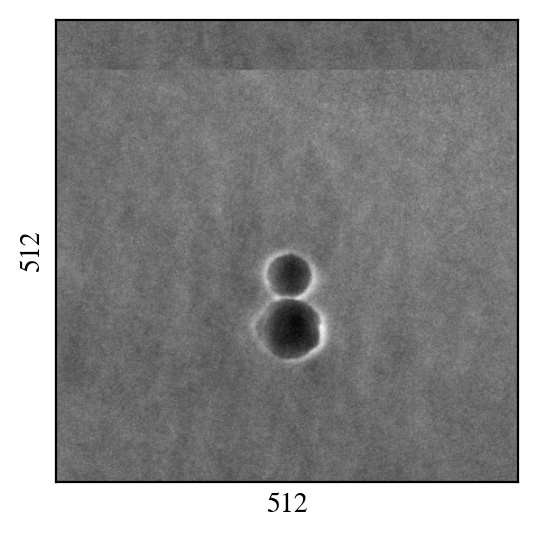

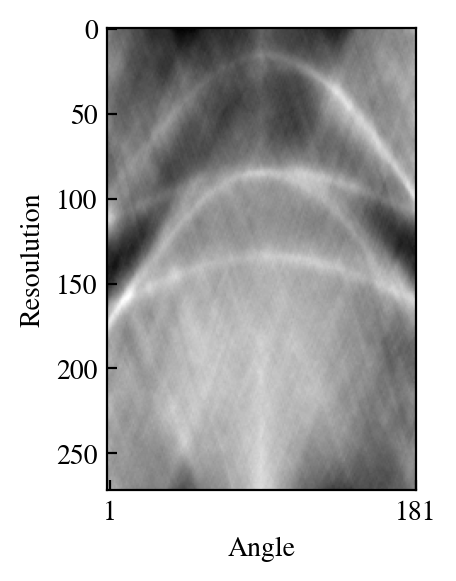

In [28]:
import glob, random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from PIL import Image
from skimage.transform import radon, iradon
mpl.rcParams['figure.dpi'] = 200
plt.rcParams["xtick.direction"] = 'in'
plt.rcParams["ytick.direction"] = 'in'
params = {
   'axes.labelsize': 10,
   'font.size': 12,
   'legend.fontsize': 10,
   'xtick.labelsize': 10,
   'ytick.labelsize': 10,
   'text.usetex': False,
   'figure.figsize': [3, 3],
   'mathtext.fontset': 'stix',
   'font.family': 'STIXGeneral'
   }
plt.rcParams.update(params)


raw_img_dir = 'data_test/sino_test/Au-b2-15s-181p-S15-aligned'
raw_files = glob.glob(f'{raw_img_dir}/*tif')

projections = []
for i, f in enumerate(raw_files):
    img = Image.open(f).resize((512, 512))
    img = np.array(img)
    img = img-img.min()
    img = img/img.max()
    projections.append(img)
projections = np.array(projections)
n_projs = len(projections)


proj_test = projections[90]
plt.imshow(proj_test, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.xlabel('512')
plt.ylabel('512')
plt.show()
plt.close()


theta = np.linspace(0.0, 180, 181)
sino_temp = radon(proj_test, theta, circle=True)
plt.imshow(sino_temp[120:-120], cmap='gray')
plt.xticks([1, 181])
plt.ylabel('Resoulution')
plt.xlabel('Angle')
plt.show()
plt.close()

### real sinogram fbp

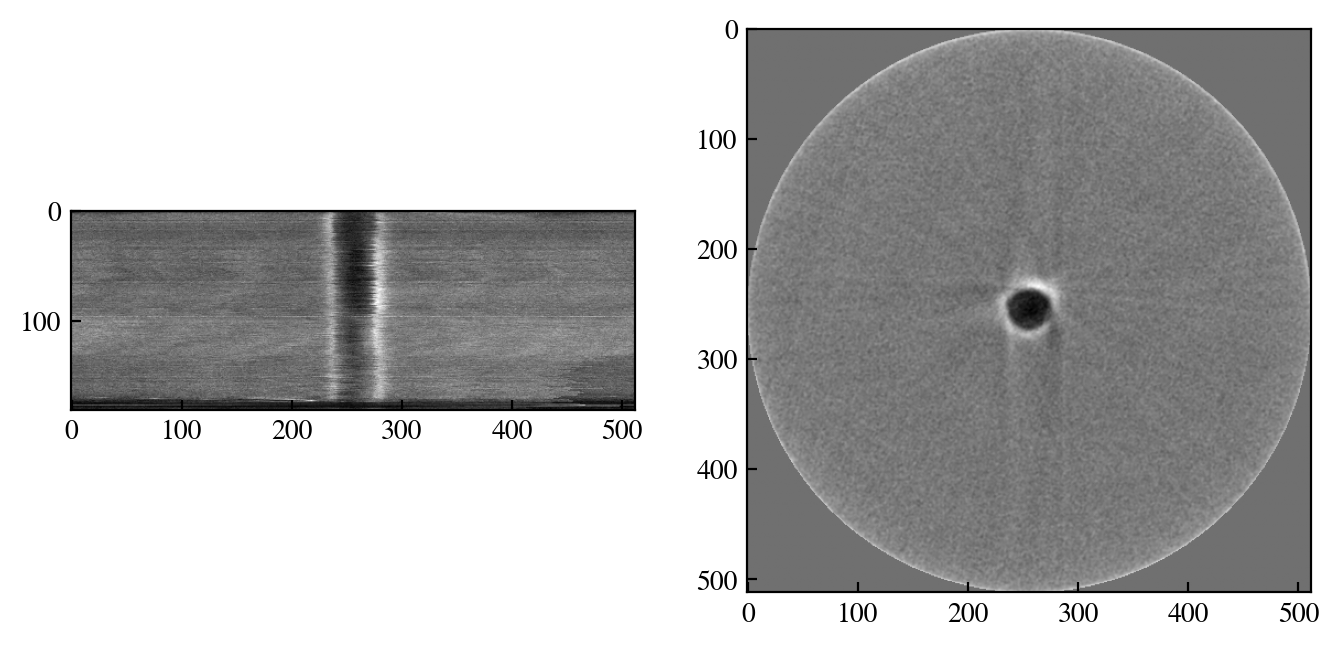

In [29]:
sino_temp = projections[:, 300, :]
recon_temp = iradon(sino_temp.T, theta, filter_name='hann')
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].imshow(sino_temp, cmap='gray')
ax[1].imshow(recon_temp, cmap='gray')
plt.show()
plt.close()

### shifted sinogram

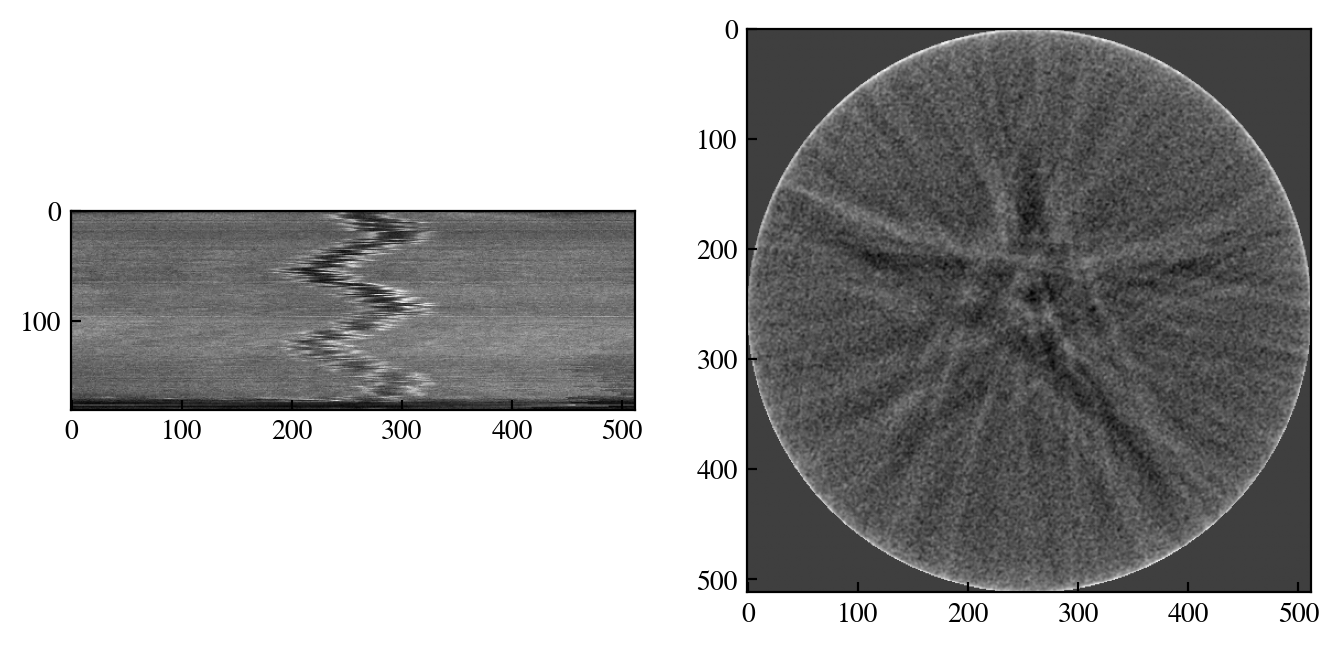

In [30]:
base_shift = 15
random_noise = np.random.randint(-base_shift, base_shift+1, 181)
x = np.arange(181)
amp, freq, phase = 50-base_shift, random.uniform(1/50, 1/181), random.uniform(-1.5, 1.5)
shift = amp * np.sin(2 * np.pi * freq * x + phase) + random_noise
for i in range(n_projs):
    sino_temp[i, :] = np.roll(sino_temp[i, :], shift=int(shift[i]))

recon_temp = iradon(sino_temp.T, theta, filter_name='hann')
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].imshow(sino_temp, cmap='gray')
ax[1].imshow(recon_temp, cmap='gray')
plt.show()
plt.close()